In [84]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

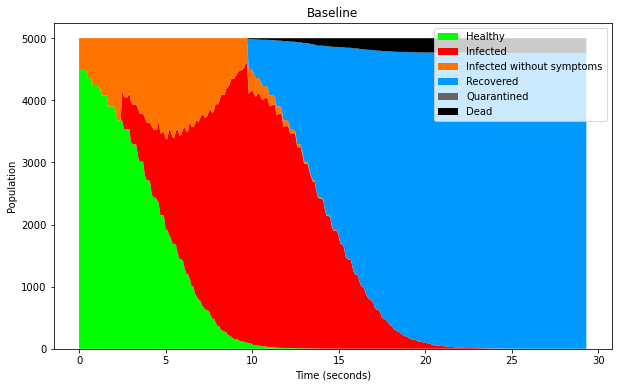

In [85]:
def plot_results(filename: str, ax, title: str):
    with open(filename, "r") as fp:
        data = json.load(fp)
    df = pd.json_normalize(data)
    df["time"] = df["time"].astype(int) / 1000


    ax.stackplot(
        df["time"],
        df["statistics.healthyCount"],
        df["statistics.infectedCount"],
        df["statistics.infectedWithoutSymptomsCount"],
        df["statistics.recoverdCount"],
        df["statistics.quarantinedCount"],
        df["statistics.deadCount"],
        colors=["#00FF00", "#FF0000", "#FF7300FF", "#0099FF", "#666666", "#000000"],
        labels=[
            "Healthy",
            "Infected",
            "Infected without symptoms",
            "Recovered",
            "Quarantined",
            "Dead",
        ],
    )

    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Population")
    ax.legend()
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(10, 6))

plot_results("baseline.json", ax, "Baseline")

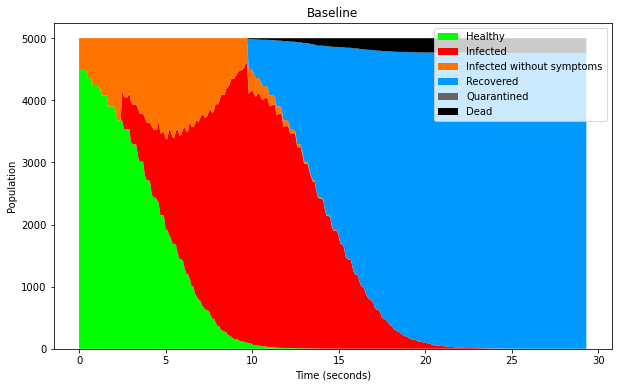

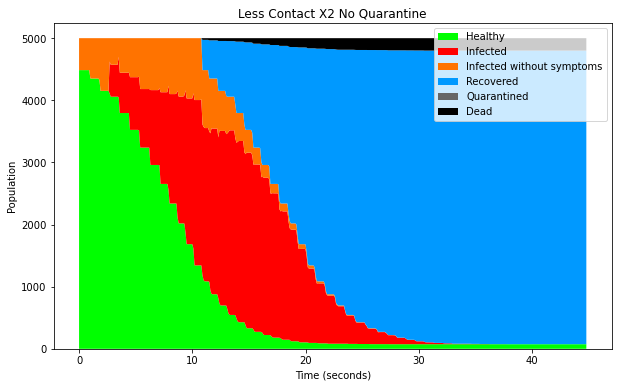

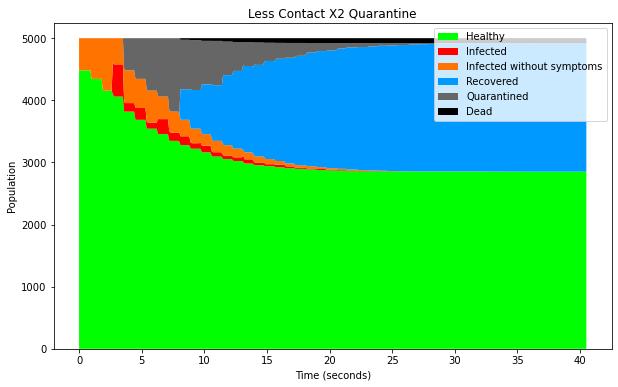

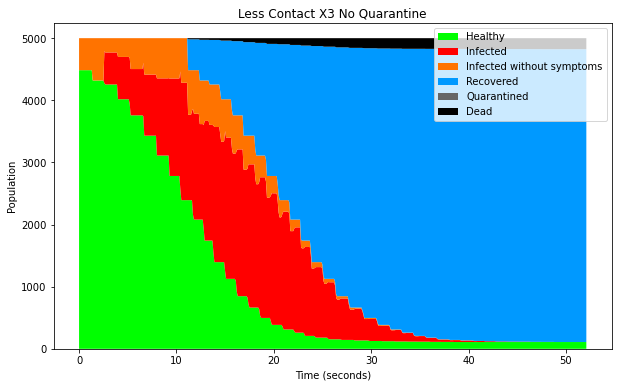

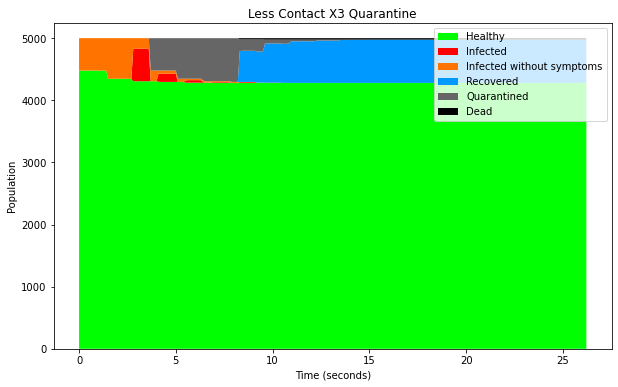

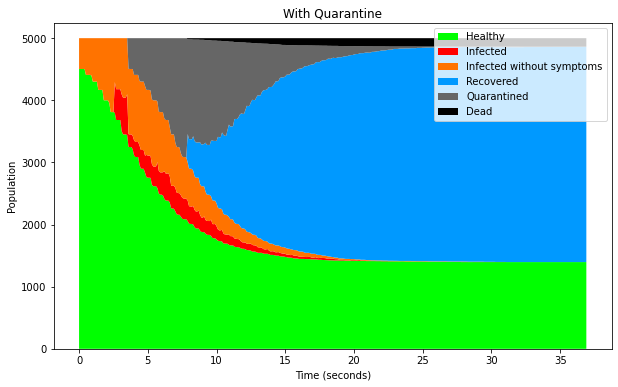

In [86]:
from typing import List

names = [
    "baseline",
    "less-contact-x2-no-quarantine",
    "less-contact-x2-quarantine",
    "less-contact-x3-no-quarantine",
    "less-contact-x3-quarantine",
    "with-quarantine"
]

def generate_pretty_names(names: List[str]):
    pretty_names = []
    for name in names:
        words = name.split("-")
        pretty_name = " ".join(word.capitalize() for word in words)
        pretty_names.append(pretty_name)
    return pretty_names

pretty_names = generate_pretty_names(names)


def generate_plots():
    for name, pretty_name in zip(names, pretty_names):
        fig, ax = plt.subplots(figsize=(10, 6))
        plot_results(f"{name}.json", ax, pretty_name)
        fig.savefig(f"{name}.png", bbox_inches="tight")
    
generate_plots()

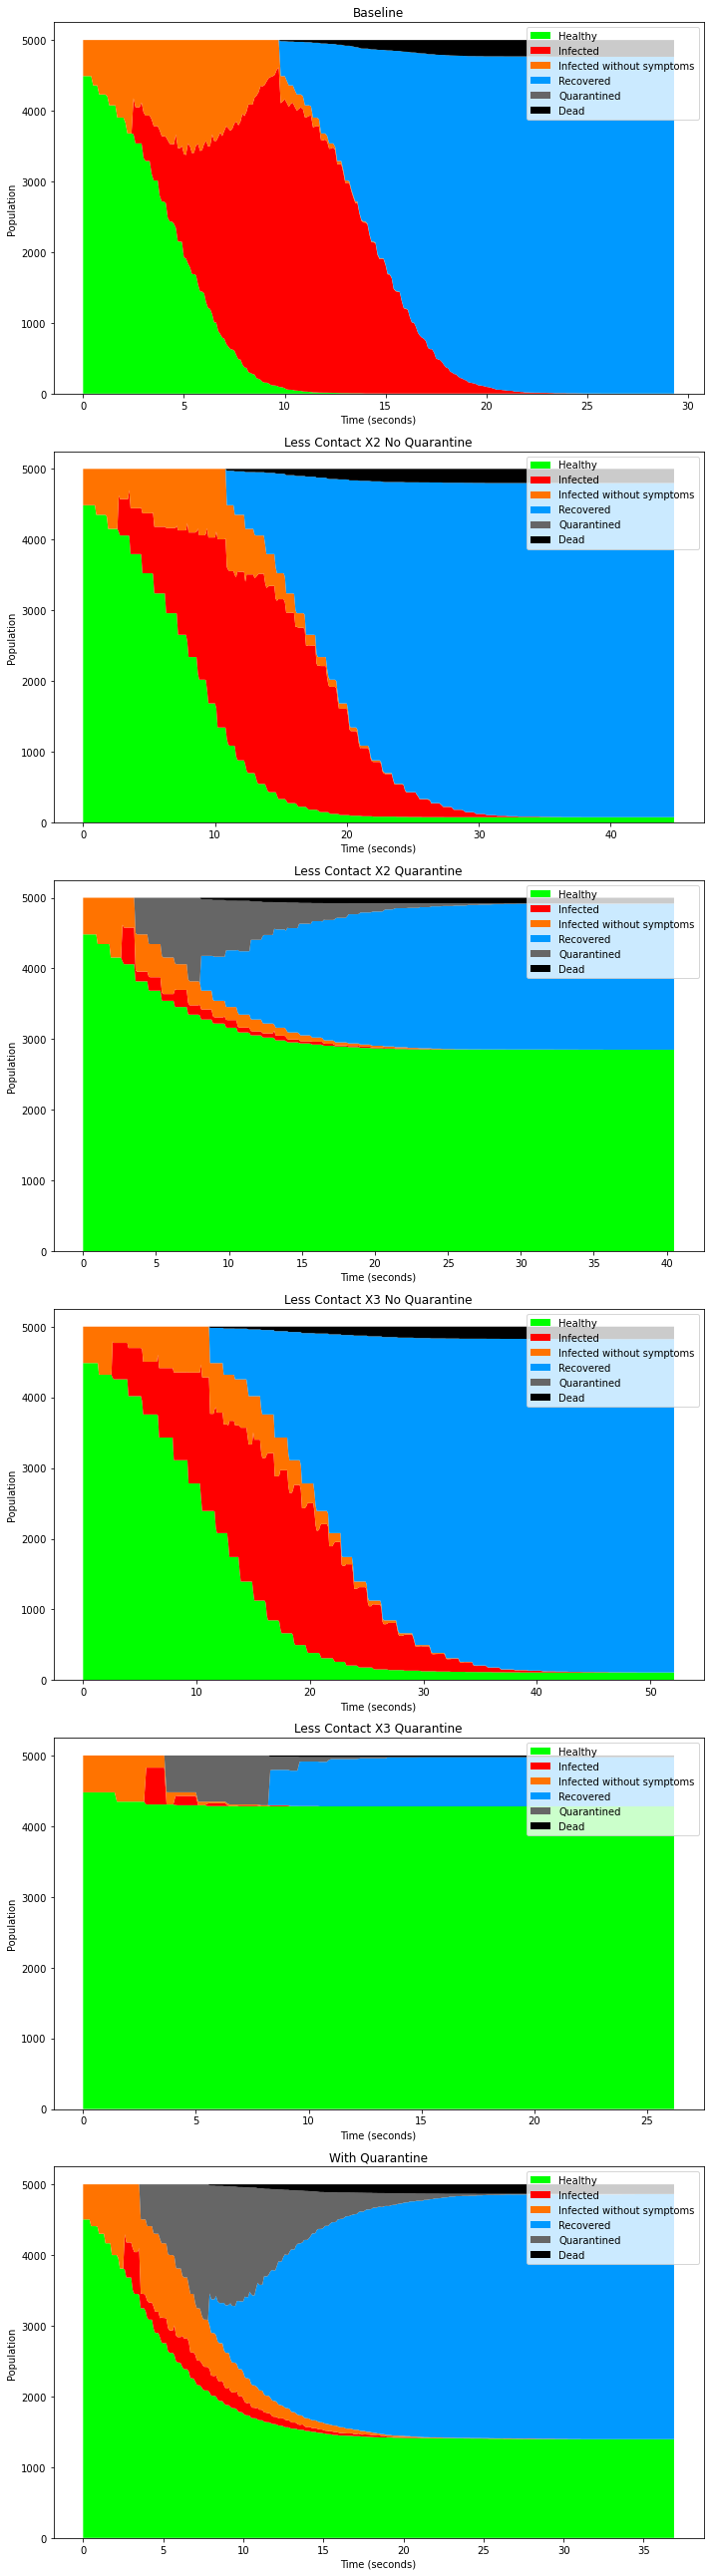

In [87]:
def generate_combined_plot():
    fig, axes = plt.subplots(nrows = len(names), ncols=1, figsize=(10, 6 * len(names)))
    for name, ax, title in zip(names, axes, pretty_names):
        plot_results(f"{name}.json", ax, title)
    fig.tight_layout()
    fig.savefig("combined_plot.png", bbox_inches="tight")

generate_combined_plot()

In [88]:
def print_dead():
    for name in names:
        with open(f"{name}.json", "r") as fp:
            data = json.load(fp)
        df = pd.json_normalize(data)
        print(f"{name}: {df.iloc[-1]}")

print_dead()


baseline: time                                       29300
statistics.infectedCount                       0
statistics.healthyCount                        1
statistics.infectedWithoutSymptomsCount        0
statistics.recoverdCount                    4762
statistics.deadCount                         237
statistics.quarantinedCount                    0
Name: 293, dtype: int64
less-contact-x2-no-quarantine: time                                       44800
statistics.infectedCount                       0
statistics.healthyCount                       74
statistics.infectedWithoutSymptomsCount        0
statistics.recoverdCount                    4726
statistics.deadCount                         200
statistics.quarantinedCount                    0
Name: 448, dtype: int64
less-contact-x2-quarantine: time                                       40500
statistics.infectedCount                       0
statistics.healthyCount                     2851
statistics.infectedWithoutSymptomsCount        0
s